In [104]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 
df = StandardScaler().fit_transform(df)

cv = KFold(n_splits=4, shuffle=True, random_state=6)

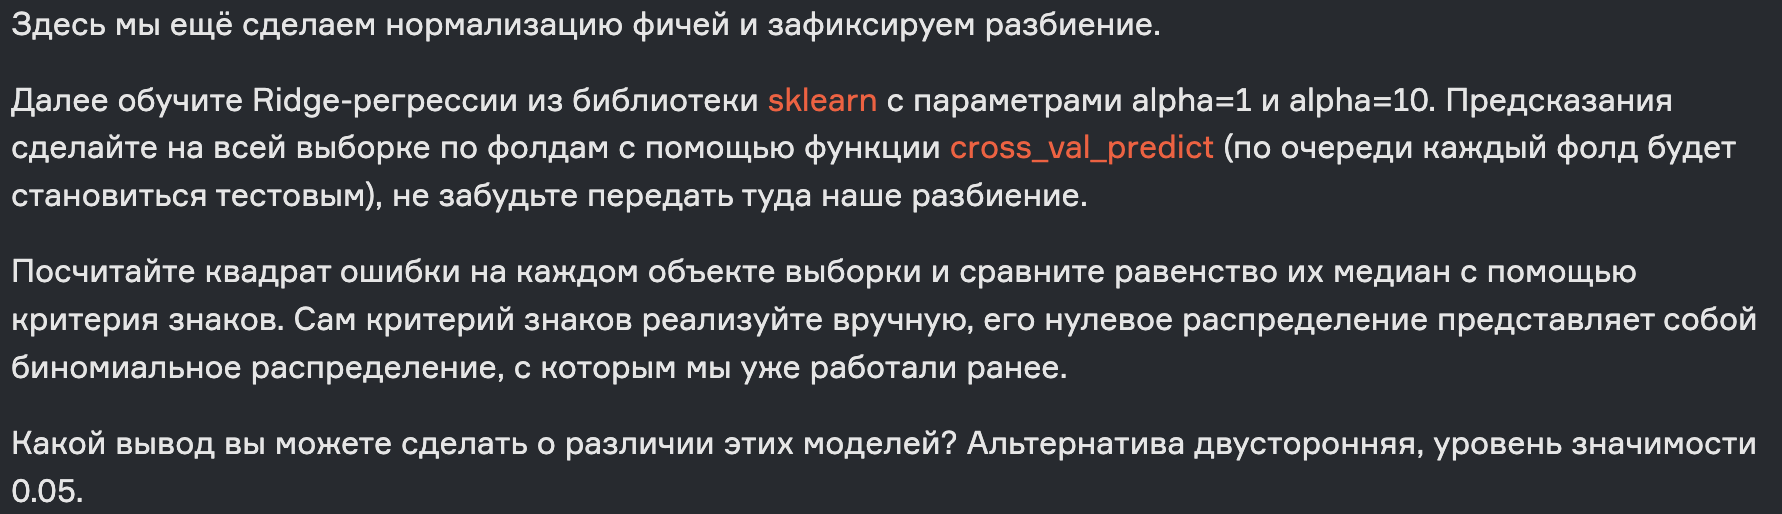

In [111]:
from sklearn.linear_model import Ridge
from scipy.stats import binomtest

ridge_1 = Ridge(alpha=1)
ridge_10 = Ridge(alpha=10)

pred_1 = cross_val_predict(ridge_1, df, target, cv=cv)
pred_10 = cross_val_predict(ridge_10, df, target, cv=cv)

mse_1 = (target - pred_1) ** 2
mse_10 = (target - pred_10) ** 2

diff = (mse_1 - mse_10) > 0
diff = diff.astype(int)

result = binomtest(diff.sum(), len(df), p=0.5)
print(result)

BinomTestResult(k=9928, n=20640, alternative='two-sided', statistic=0.4810077519379845, pvalue=5.015427635331783e-08)


In [122]:
for_sort = [7, 1, 5, 1, 3, 2, 5]
stats.rankdata(for_sort, method='average')

array([7. , 1.5, 5.5, 1.5, 4. , 3. , 5.5])

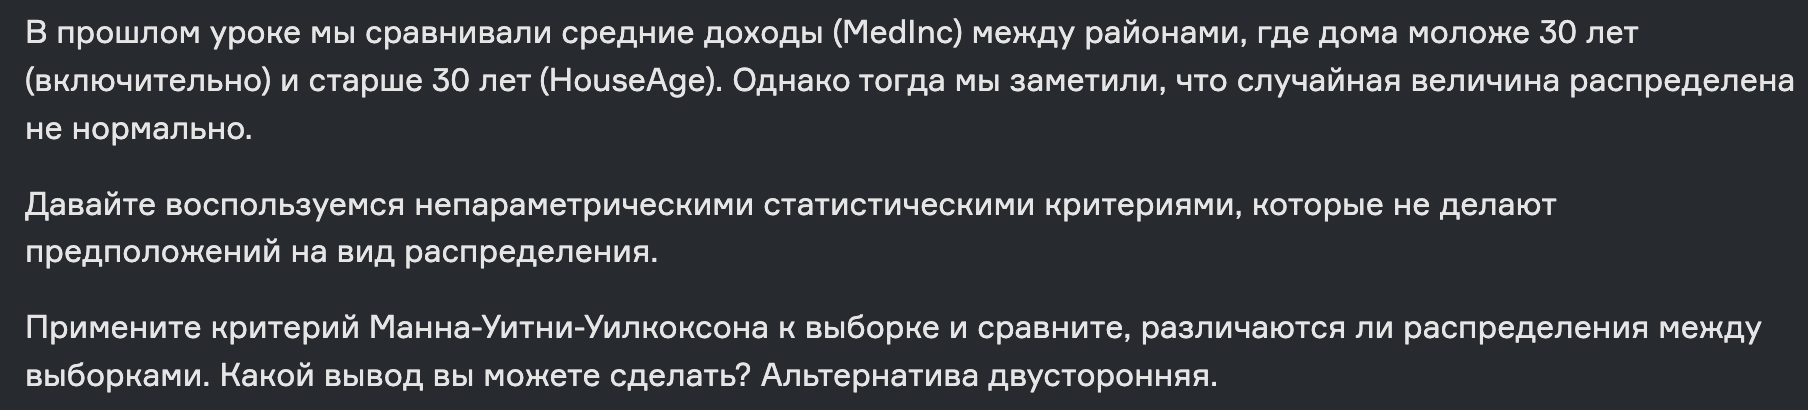

In [123]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [129]:
from scipy import stats

df['target'] = target

young = df[df['HouseAge'] <= 30]['MedInc']
old = df[df['HouseAge'] > 30]['MedInc']

stats.mannwhitneyu(young, old, alternative='two-sided')


MannwhitneyuResult(statistic=59254034.5, pvalue=5.345198689020036e-50)